<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/10_decision_trees/4_decision_trees_oefeningen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

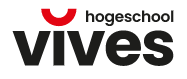<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# **BESLISSINGSBOMEN - OEFENINGEN**

Om de Scikit-Learn code voor het opstellen van decision trees voor classificatie in te oefenen, kan je natuurlijk dezelfde datasets gebruiken als in de vorige topics over classificatie (perceptron, logistic regression en KNN). Hier introduceren we enkele nieuwe datasets en tonen we ook hoe je m.b.v. Scikit-Learn zelf eenvoudig datasets kan genereren.

## Oefening 1: Astronaut

Zet de volgende dataset uit [dit artikel](https://towardsdatascience.com/decision-trees-for-classification-complete-example-d0bc17fcf1c2) om naar een Pandas DataFrame en gebruik Scikit-Learn om er een decision tree op te trainen. Evalueer het model en plot de bekomen beslissingsboom.

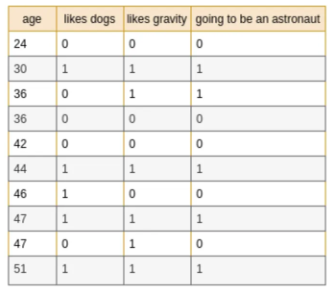

Krijg je ook onderstaande beslissingsboom zoals in het artikel?

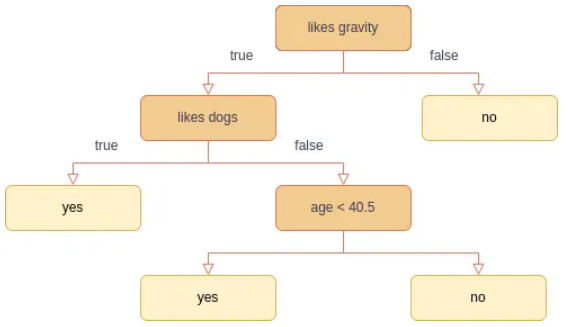

## Oefening 2: thermostaat

De thermostaat dataset is ons niet onbekend, want we pasten die toe in de introductie van dit vak om het verschil uit te leggen tussen traditioneel programmeren en machine learning. We gaan diezelfde dataset gebruiken om een beslissingsboom op te trainen.

Importeer Pandas, NumPy en module pyplot van Matplotlib.

Lees de file `'thermostat.csv'` in als Pandas DataFrame `df`. Verken de dataset door de eerste 5 rijen te tonen.

Vraag overzichtsinfo op over de dataset.

Ken het totaal aantal samples in de dataset toe aan variabele `n`.

Voeg een kolom `'heating_on'` toe die aangeeft of de verwarming aan staat (`True`) of uit (`False`). Zet de booleans om naar integers (1 of 0).

Maak een scatterplot die de `'heating_on'` variabele uitzet in functie van de `'temperatuur'`.

Bepaal de drempelwaarde tussen verwarming aan en uit als het gemiddelde van het maximum van de temperaturen waarbij de verwarming aan staat en het minimum van de temperaturen waarbij de verwarming uit staat. Negeer de outlier van 14° met label 'off'. Je kan dit eenvoudig doen door het minimum te berekenen van alle 'off' temperaturen die groter zijn dan het maximum van de 'on' temperaturen.

We gaan diezelfde drempelwaarde afleiden aan de hand van de Gini Impurity en Gini Gain, waarbij we de dataset zullen splitsen op alle mogelijke drempelwaarden gelegen tussen twee opeenvolgende temperaturen.

Sorteer eerst de dataset volgens de temperatuur, en reset de indices.

Bereken nu het gemiddelde van twee opeenvolgende temperaturen. Stop die gemiddeldes in een nieuwe variabele `thresholds`. Je hoeft hier geen lus te gebruiken!

Definieer een anonieme functie `p` adhv `lambda` die in een dataframe `df` de relatieve frequentie berekent van de datapunten met label 'on'. De input van de functie is dus `df`, de output is de relatieve frequentie gedefinieerd als het aantal 'on' datapunten gedeeld door het totaal aantal datapunten. Pas op! Deze functie moet je ook kunnen toepassen op een subset van de totale dataset!

Bereken nu de Gini index van de dataset `df` als:

> `gini = 2*p(df)*(1-p(df))`

Print de berekende Gini waarde uit.

Ga nu met een `for`-loop door de verschillende drempelwaarden die je in variabele `thresholds` hebt opgeslagen. Splits de dataset `df` op in twee subsets `df1` en `df2`, waarbij `df1` alle datapunten bevat met een temperatuur kleiner dan de drempelwaarde en `df2` alle andere datapunten. Bereken de Gini index voor `df1` en `df2` door gebruik te maken van anonieme functie `p`. Bereken tenslotte de Gini Gain en hou die bij in een list toegekend aan variabele `gain`. De Gini Gain bereken je als volgt:

> `gain = gini - len(df1)/n*gini1 - len(df2)/n*gini2`

met `n` het totaal aantal samples in de originele dataset `df`, `gini` de Gini index van die dataset die je eerder hebt bepaald, en `gini1` en `gini2` de Gini indices van `df1` en `df2`, respectievelijk.

Maak nu gebruik van NumPy functie `argmax` om de drempelwaarde te bepalen met de hoogste `gain`. Wat is de bijhorende Gini Gain?

Als alles correct is berekend, dan krijg je ook hier diezelfde temperatuur van 18.95°C als beste drempelwaarde!

Train nu een decision tree op deze dataset gebruik makend van Scikit-Learn. Beperk de diepte van de boom tot 1 (dit is een zogenaamde decision stump). Bereken de nauwkeurigheid en plot de boom. Je krijgt ook hier de drempelwaarde van 18.95°C omdat Scikit-Learn deze op dezelfde manier heeft afgeleid.

## Oefening 3: thermostaat 2

In deze oefening werken we met een meer uitgebreide versie van de thermostaat dataset die ook informatie bevat over het aantal personen in de kamer en of de ramen al dan niet open en staan.

- Lees de file `'thermostat2.csv'` in.
- Verken de data.
- Vervang de NaN-waarden in de kolom met het aantal personen door 0.
- Splits de dataset op in training-, validatie- en testset. Gebruik 60% van de data voor de training; validatie- en testset zijn even groot.
- Train een decision tree op de trainingset.
- Finetune de maximale diepte van de boom mbv de validatieset.
- Voer een finale evaluatie uit aan de hand van de testset.
- Hertrain op de volledige dataset. Evalueer je finale model adhv een *classification report* en plot ook een *confusion matrix*.
- Plot de resulterende beslissingsboom.
- Staat de verwarming aan wanneer er één iemand in het lokaal aanwezig is, het raam open staat en het 18°C is?

## Oefening 4: Moons dataset

Scikit-Learn voorziet toy datasets die je kan gebruiken om je machine learning skills in te oefenen. Eén van die datasets is de [Moons dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html). Als je die dataset plot, dan zijn het precies twee halve manen; vandaar de naam.

- Creëer een dataset m.b.v. de `make_moons` functie die bestaat uit 10 000 samples met een `noise` gelijk aan 0.4.
- Maak een scatterplot van de gegenereerde dataset. Zorg dat de datapunten ingekleurd zijn volgens hun label.
- Splits de dataset op in een training- en testset waarbij je 80% van de data in de eerste stopt.
- Train een decision tree op de trainingset. Pas grid search met cross-validatie toe om de volgende hyperparameters te finetunen (waarbij je gebruik maakt van de nauwkeurigheid als score):
  - `max_depth`: laten variëren van 1 tot 10
  - `min_samples_split`: laten variëren van 2 tot 10
  - `min_samples_leaf`: laten variëren van 1 tot 10
- Check het beste model en evalueer het adhv de training- en testset.
- Hertrain het beste model op de volledige dataset.
- Evalueer het hertrainde beste model adhv een confusion matrix en classificatierapport.